# Market Prices time-series dataset released by OCHA

Link to the Market Prices data released by OCHA: https://data.humdata.org/ (WFP is the main source). We decide to download the data from OCHA website because they provide also the information about the 'food groups'.

In [1]:
import pandas as pd
import numpy as np
import ntpath
import glob
# Set a value for the column width.
pd.options.display.max_colwidth = 30

In [2]:
# Add the python path to the folder containing some useful custom packages.
import sys
sys.path.insert(0, "../../packages/")
from map_plot import draw_adminstratas
from TsIP.TsIP import TsIP

In [3]:
# Define the path where the results arising from this analysis will be saved.
PATH_TO_SAVE_DATA = "./output_timeseries/"

In [4]:
# Read the data released by OCHA regarding the market prices indicator stored in the 'wfp_data' folder.
path = "./wfp_data/"
all_files = glob.glob(path + "*.csv")

dfs = []

# Concatenate the data of the countries in an unique dataframe.
for filename in all_files:
    df = pd.read_csv(filename, header = 1)
    df["Country"] = ntpath.basename(filename).split(".")[0]
    dfs.append(df)

# Concatenate data.
df = pd.concat(dfs, axis = 0, ignore_index = True)
# Delete duplicate rows if exist.
df = df.drop_duplicates()
df.head()

,#date,#item+name,#item+unit,#item+type,#value,#currency,#country+name,#adm1+name,#adm1+code,#name+market,Unnamed: 10,#item+code,Unnamed: 12,Unnamed: 13,#item+type+code,#meta+id,Unnamed: 16,Country
0,2020-04-15,Rice (imported) - Retail,KG,cereals and tubers,400.0,XOF,Burkina Faso,Boucle Du Mouhoun,40276,Tougan,141,64,15,5,1,141_64_15_5,NaN,Burkina Faso
1,2020-05-15,Rice (imported) - Retail,KG,cereals and tubers,400.0,XOF,Burkina Faso,Boucle Du Mouhoun,40276,Tougan,141,64,15,5,1,141_64_15_5,NaN,Burkina Faso
2,2020-06-15,Rice (imported) - Retail,KG,cereals and tubers,400.0,XOF,Burkina Faso,Boucle Du Mouhoun,40276,Tougan,141,64,15,5,1,141_64_15_5,NaN,Burkina Faso
3,2020-07-15,Rice (imported) - Retail,KG,cereals and tubers,400.0,XOF,Burkina Faso,Boucle Du Mouhoun,40276,Tougan,141,64,15,5,1,141_64_15_5,NaN,Burkina Faso
4,2020-08-15,Rice (imported) - Retail,KG,cereals and tubers,400.0,XOF,Burkina Faso,Boucle Du Mouhoun,40276,Tougan,141,64,15,5,1,141_64_15_5,NaN,Burkina Faso


In [5]:
# Rename some columns names.
df.rename(columns = {"#date": "Datetime", "#item+name": "Commodity", "#item+unit": "Unit", "#item+type": "Food Group", "#value": "Price", "#currency": "Currency", "#adm1+name": "AdminStrata"}, inplace = True)
# Select only some feature items.
df = df[["Datetime", "Commodity", "Unit", "Food Group", "Price", "Currency", "AdminStrata", "Country"]]
df.head()

,Datetime,Commodity,Unit,Food Group,Price,Currency,AdminStrata,Country
0,2020-04-15,Rice (imported) - Retail,KG,cereals and tubers,400.0,XOF,Boucle Du Mouhoun,Burkina Faso
1,2020-05-15,Rice (imported) - Retail,KG,cereals and tubers,400.0,XOF,Boucle Du Mouhoun,Burkina Faso
2,2020-06-15,Rice (imported) - Retail,KG,cereals and tubers,400.0,XOF,Boucle Du Mouhoun,Burkina Faso
3,2020-07-15,Rice (imported) - Retail,KG,cereals and tubers,400.0,XOF,Boucle Du Mouhoun,Burkina Faso
4,2020-08-15,Rice (imported) - Retail,KG,cereals and tubers,400.0,XOF,Boucle Du Mouhoun,Burkina Faso


The data have a monthly granularity. We convert the temporal information to an appropriate pandas datetime object selecting the data beyond a defined year in order to reduce the amount of data to analyze. The 15th of the month is used as a convention to indicate that the price is valid for the corresponding entire month.

In [6]:
# Creation of an accurate datetime format.
df["Datetime"] = pd.to_datetime(df["Datetime"])
df.sort_values("Datetime", ascending = True, inplace = True) 
df.reset_index(drop = True, inplace = True)
df.head()

,Datetime,Commodity,Unit,Food Group,Price,Currency,AdminStrata,Country
0,1992-01-15,Millet - Retail,KG,cereals and tubers,64.00,XOF,Sud-ouest,Burkina Faso
1,1992-01-15,Millet - Retail,KG,cereals and tubers,75.75,XOF,Sahel,Burkina Faso
2,1992-01-15,Millet - Retail,KG,cereals and tubers,57.67,XOF,Sahel,Burkina Faso
3,1992-01-15,Millet - Retail,KG,cereals and tubers,53.00,XOF,Boucle Du Mouhoun,Burkina Faso
4,1992-01-15,Millet - Retail,KG,cereals and tubers,73.00,XOF,Sahel,Burkina Faso


In [7]:
# Select only the data beyond this year.
year = 2018

In [8]:
df = df.loc[pd.DatetimeIndex(df.Datetime).year >= year]
df.reset_index(drop = True, inplace = True)
df.head()

,Datetime,Commodity,Unit,Food Group,Price,Currency,AdminStrata,Country
0,2018-01-15,Yogurt - Retail,KG,milk and dairy,325.0000,SYP,Idleb,Syria
1,2018-01-15,Oil (palm) - Retail,100 L,oil and fats,613.8667,NGN,Borno,Nigeria
2,2018-01-15,Rice (local) - Retail,KG,cereals and tubers,250.0000,NGN,Yobe,Nigeria
3,2018-01-15,Rice (local) - Retail,KG,cereals and tubers,274.0000,XOF,Hauts-bassins,Burkina Faso
4,2018-01-15,Tomatoes - Retail,KG,vegetables and fruits,150.0000,YER,Ibb,Yemen


### Brief items description

In [9]:
print("Check if the dataframe contains NaN values:")
df.isnull().sum()

Check if the dataframe contains NaN values:


Datetime       0
Commodity      0
Unit           0
Food Group     0
Price          0
Currency       0
AdminStrata    0
Country        0
dtype: int64

### Country item

In [10]:
print("The countries in the dataset are:", ", ".join(df.Country.unique()))

The countries in the dataset are: Syria, Nigeria, Burkina Faso, Yemen


### AdminStrata item

In [11]:
# Rename the name of some AdminStrata of Burkina Faso according to the fcs and rcsi names of the AdminStrata.
df.replace(["Boucle Du Mouhoun", "Sud-ouest", "Plateau Central", "Centre-est", "Centre-ouest", "Centre-nord", "Centre-sud", "Hauts-bassins"], 
           ["Boucle-Du-Mouhoun", "Sud-Ouest", "Plateau-Central", "Centre-Est", "Centre-Ouest", "Centre-Nord", "Centre-Sud", "Hauts-Bassins"], inplace = True)

In [12]:
# Rename the name of some AdminStrata of Syria according to the fcs and rcsi names of the AdminStrata.
df.replace(["As_Suweida", "Dara", "Damascus", "City_Damascus", "Hassakeh", "Raqqa", "Dayr_Az_Zor", "Al_Qunaytirah"], 
           ["As-Sweida", "Dar'a", "Rural Damascus", "Damascus", "Al-Hasakeh", "Ar-Raqqa", "Deir-ez-Zor", "Quneitra"], inplace = True)

In [13]:
AdminStratas = df.groupby("Country")["AdminStrata"].unique()

- **Yemen (YEM)**: the governorates of Yemen are 22, including the capital Sana'a (Amanat Al Asimah) and Socotra archipelago.  The Market Prices dataframe has the values of 21 governorates (Socotra not included; more precisely, Socotra is considered into the Hadramaut province. In fact, a market of Hadramaut province is placed on Socotra island).

In [14]:
print(AdminStratas["Yemen"].shape)
AdminStratas["Yemen"]

(21,)


array(['Ibb', 'Al Bayda', "Sa'ada", 'Hajjah', 'Marib', 'Shabwah',
       'Hadramaut', 'Lahj', 'Amanat Al Asimah', 'Dhamar', 'Taizz',
       'Al Maharah', 'Amran', 'Al Jawf', 'Al Hudaydah', 'Raymah',
       "Sana'a", 'Al Mahwit', 'Aden', 'Abyan', "Al Dhale'e"], dtype=object)

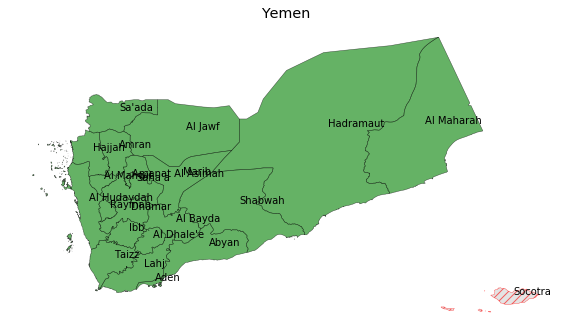

In [15]:
draw_adminstratas("Yemen", AdminStratas["Yemen"], "../Shape Files/shapefiles/Yemen/administrative level 1", figsize = (10, 7), 
                  cmap = "ocean", annotation = True, path_to_save = PATH_TO_SAVE_DATA + "Yemen/map_marketprice_yemen.png", dpi = 300)

- **Nigeria (NGA)**: Nigeria is divided into 36 states. It also includes The Federal Capital Territory that is not a state and it is under the direct control of the federal government. The AdminStrata items of the Market Price dataframe cover 13 states.

In [16]:
print(AdminStratas["Nigeria"].shape)
AdminStratas["Nigeria"]

(13,)


array(['Borno', 'Yobe', 'Kano', 'Zamfara', 'Katsina', 'Lagos', 'Kebbi',
       'Oyo', 'Jigawa', 'Gombe', 'Kaduna', 'Adamawa', 'Sokoto'],
      dtype=object)

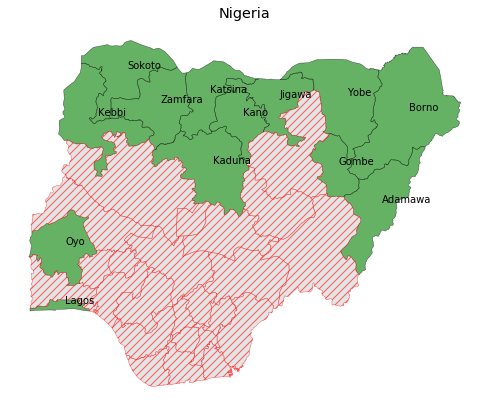

In [17]:
draw_adminstratas("Nigeria", AdminStratas["Nigeria"], "../Shape Files/shapefiles/Nigeria/administrative level 1", figsize = (10, 7), annotation = True, 
                  cmap = "ocean", annotation_selected = True, path_to_save = PATH_TO_SAVE_DATA + "Nigeria/map_marketprice_nigeria.png", dpi = 300)

- **Syria (SYR)**: the governatores of the Syria country are 14. The Food Price dataframe has the values of all 14 governatores.

In [18]:
print(AdminStratas["Syria"].shape)
AdminStratas["Syria"]

(14,)


array(['Idleb', 'Deir-ez-Zor', 'Homs', 'Ar-Raqqa', 'Damascus',
       'As-Sweida', 'Quneitra', 'Al-Hasakeh', 'Tartous', 'Lattakia',
       'Hama', 'Aleppo', 'Rural Damascus', "Dar'a"], dtype=object)

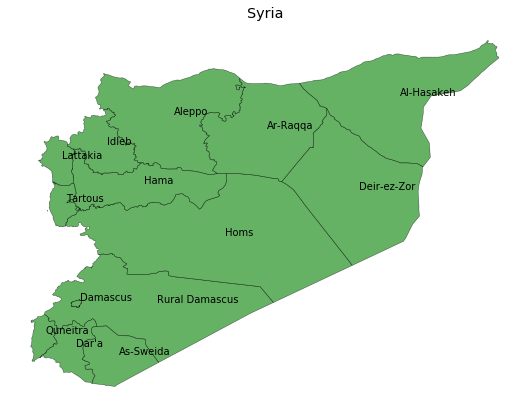

In [19]:
draw_adminstratas("Syria", AdminStratas["Syria"], "../Shape Files/shapefiles/Syria/administrative level 1", figsize = (10, 7), 
                  cmap = "ocean", annotation = True, path_to_save = PATH_TO_SAVE_DATA + "Syria/map_marketprice_syria.png", dpi = 300)

- **Burkina Faso (BFA)**: Burkina Faso is divided into 13 administrative regions. The Market Price dataframe has the values of all 13 regions.

In [20]:
print(AdminStratas["Burkina Faso"].shape)
AdminStratas["Burkina Faso"]

(13,)


array(['Hauts-Bassins', 'Centre', 'Sud-Ouest', 'Centre-Ouest',
       'Plateau-Central', 'Nord', 'Centre-Nord', 'Sahel',
       'Boucle-Du-Mouhoun', 'Est', 'Centre-Est', 'Centre-Sud', 'Cascades'],
      dtype=object)

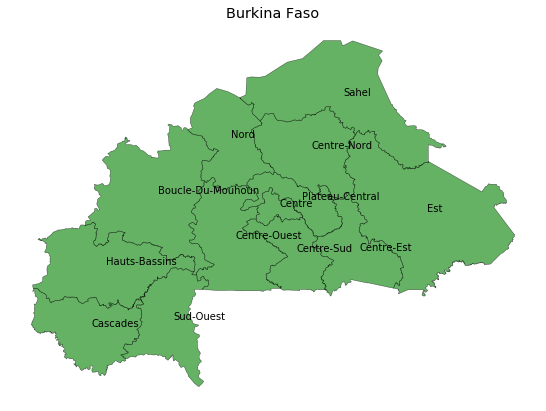

In [21]:
draw_adminstratas("Burkina Faso", AdminStratas["Burkina Faso"], "../Shape Files/shapefiles/Burkina Faso/administrative level 1", figsize = (10, 7), 
                  cmap = "ocean", annotation = True, path_to_save = PATH_TO_SAVE_DATA + "Burkina Faso/map_marketprice_burkina.png", dpi = 300)

### Market prices preprocessing

In [22]:
print("The types of commodities:")
np.sort(df.Commodity.unique())

The types of commodities:


array(['Apples - Retail', 'Bananas - Retail',
       'Beans (kidney red) - Retail', 'Beans (niebe) - Retail',
       'Beans (red) - Retail', 'Beans (white) - Retail',
       'Bread (bakery) - Retail', 'Bread (shop) - Retail',
       'Bread - Retail', 'Bulgur - Retail', 'Bulgur - Wholesale',
       'Carrots - Retail', 'Cassava meal (gari, yellow) - Retail',
       'Cassava meal (gari, yellow) - Wholesale', 'Cheese - Retail',
       'Chickpeas - Retail', 'Cowpeas (brown) - Retail',
       'Cowpeas (brown) - Wholesale', 'Cowpeas (white) - Retail',
       'Cowpeas (white) - Wholesale', 'Cowpeas - Retail',
       'Cucumbers - Retail', 'Dates - Retail', 'Diapers - Retail',
       'Dishwashing liquid - Retail', 'Eggplants - Retail',
       'Eggs - Retail', 'Exchange rate (unofficial) - Retail',
       'Fish (sardine, canned) - Retail', 'Fish (tuna, canned) - Retail',
       'Fish - Retail', 'Fuel (diesel) - Retail',
       'Fuel (diesel, parallel market) - Retail', 'Fuel (gas) - Retail',
    

N.B. Not all the provinces have a time-series for all this commodities.

In [23]:
print("The types of food groups:")
np.sort(df["Food Group"].unique())

The types of food groups:


array(['cereals and tubers', 'meat, fish and eggs', 'milk and dairy',
       'miscellaneous food', 'non-food', 'oil and fats',
       'pulses and nuts', 'vegetables and fruits'], dtype=object)

We decide to keep and isolate some commodities from the 'non-food' group grouping them into new food groups.

In [24]:
df[df["Food Group"] == "non-food"].Commodity.unique()

array(['Wage (non-qualified labour) - Retail', 'Fuel (gas) - Retail',
       'Exchange rate (unofficial) - Retail',
       'Fuel (petrol-gasoline) - Retail',
       'Wage (qualified labour) - Retail', 'Fuel (diesel) - Retail',
       'Milling cost (wheat) - Retail', 'Water (drinking) - Retail',
       'Fuel (diesel, parallel market) - Retail',
       'Fuel (gas, parallel market) - Retail',
       'Multipurpose soap - Retail', 'Sanitary pads - Retail',
       'Diapers - Retail', 'Toothpaste - Retail',
       'Dishwashing liquid - Retail'], dtype=object)

In [25]:
def select_non_food(group):
    if group.name == "non-food":
        # Keep the commodities about the fuel prices.
        group.loc[group.Commodity.str.contains("Fuel"), "Food Group"] = "Fuel"
        # Keep the commodities about the exchange rate.
        group.loc[group.Commodity.str.contains("Exchange rate"), "Food Group"] = "Exchange rate"
        # Keep the commodities about the wages.
        group.loc[group.Commodity.str.contains("Wage"), "Food Group"] = "Wage"
        return group
    else:
        group["Food Group"] = group["Food Group"].str.capitalize()
        return group

df = df.groupby("Food Group", group_keys = False).apply(select_non_food)

In [26]:
# Select sub-dataframe ignoring the remaining 'non-food' commodities.
df = df.loc[df["Food Group"] != "non-food"]
df.head()

,Datetime,Commodity,Unit,Food Group,Price,Currency,AdminStrata,Country
0,2018-01-15,Yogurt - Retail,KG,Milk and dairy,325.0000,SYP,Idleb,Syria
1,2018-01-15,Oil (palm) - Retail,100 L,Oil and fats,613.8667,NGN,Borno,Nigeria
2,2018-01-15,Rice (local) - Retail,KG,Cereals and tubers,250.0000,NGN,Yobe,Nigeria
3,2018-01-15,Rice (local) - Retail,KG,Cereals and tubers,274.0000,XOF,Hauts-Bassins,Burkina Faso
4,2018-01-15,Tomatoes - Retail,KG,Vegetables and fruits,150.0000,YER,Ibb,Yemen


In [27]:
print("The types of food groups:")
np.sort(df["Food Group"].unique())

The types of food groups:


array(['Cereals and tubers', 'Exchange rate', 'Fuel',
       'Meat, fish and eggs', 'Milk and dairy', 'Miscellaneous food',
       'Oil and fats', 'Pulses and nuts', 'Vegetables and fruits', 'Wage'],
      dtype=object)

In [28]:
print("The unit of measure of the commodoties:")
df.Unit.unique()

The unit of measure of the commodoties:


array(['KG', '100 L', 'Day', 'Unit', '18 KG', '160 G', '1.3 KG', 'L',
       'USD/LCU', 'MT', '20 G', '1.2 KG', '750 ML', '250 G', '100 KG',
       'Head', '1.4 KG', 'Packet', '30 pcs', '25 KG', '50 KG', '3.1 KG',
       '0.5 KG', '2.1 KG', '125 G', '1.5 KG', '1.1 KG', '400 G', '3.4 KG',
       '300 G', '100 Tubers'], dtype=object)

In [29]:
# Check if some commodities are measured using multiple unit types among the countries.
commodities_units = dict()

def unit_check(group):
    if len(group.Unit.unique()) > 1:
        commodities_units[(group.Commodity.unique()[0], group.Country.unique()[0])] = list(group.Unit.unique())

df.groupby(["Country", "Commodity"]).apply(unit_check);
print(commodities_units)

{('Beans (red) - Retail', 'Nigeria'): ['1.2 KG', '1.3 KG'], ('Beans (white) - Retail', 'Nigeria'): ['1.3 KG', '1.2 KG'], ('Cowpeas - Retail', 'Nigeria'): ['1.2 KG', '1.3 KG'], ('Fish - Retail', 'Nigeria'): ['1.2 KG', '1.5 KG'], ('Groundnuts - Retail', 'Nigeria'): ['1.1 KG', '1.2 KG'], ('Millet - Retail', 'Nigeria'): ['KG', '1.4 KG'], ('Oil (palm) - Retail', 'Nigeria'): ['100 L', 'L', '750 ML'], ('Oil (palm) - Wholesale', 'Nigeria'): ['100 L', 'L'], ('Onions - Retail', 'Nigeria'): ['0.5 KG', '400 G'], ('Rice (imported) - Retail', 'Nigeria'): ['KG', '1.4 KG'], ('Rice (local) - Retail', 'Nigeria'): ['KG', '1.4 KG'], ('Rice (milled, local) - Wholesale', 'Nigeria'): ['50 KG', '100 KG'], ('Sorghum - Retail', 'Nigeria'): ['1.4 KG', '1.3 KG'], ('Yam - Retail', 'Nigeria'): ['KG', '3.1 KG', '3.4 KG'], ('Yam - Wholesale', 'Nigeria'): ['100 KG', '100 Tubers'], ('Oil (vegetable) - Retail', 'Yemen'): ['L', 'KG']}


Convert all the commodities with multiple units to have a single unit and, when possible, the commodities with a single unit to have a smaller unit (as KG).

**ATTENTION**. There is an ambiguous commodity with two unit types: *100 Tubers* and *100 KG* unit. Not knowing the conversion, we decide to delete the corresponding commodity for each adminstrata of the country of interest.

In [30]:
def adjust_unit(group):
    def conversion(row):
        unit = row.Unit.split()
        price = row.Price
        commodity = row.Commodity
        # Select the common unit of measure.
        if unit[-1] == "KG" and commodity == "Oil (vegetable) - Retail":
            unit = "L"
            price = price / 1.08
            return pd.Series([unit, price, commodity])     
        elif unit[-1] == "KG":
            if len(unit) > 1:
                div = float(unit[0])
            else:
                div = 1
            unit = "KG"
            price = price / div
            return pd.Series([unit, price, commodity])    
        # Select the common unit of measure.
        elif unit[-1] == "G":
            if len(unit) > 1:
                div = float(unit[0])/1000
            else:
                div = 1/1000
            unit = "KG"
            price = price / div
            return pd.Series([unit, price, commodity])    
        elif unit[-1] == "MT":
            if len(unit) > 1:
                div = float(unit[0]) * 1000
            else:
                div = 1000
            unit = "KG"
            price = price / div
            return pd.Series([unit, price, commodity])    
        elif unit[-1] == "L":
            if len(unit) > 1:
                div = float(unit[0])
            else:
                div = 1
            unit = "L"
            price = price / div
            return pd.Series([unit, price, commodity])    
        elif unit[-1] == "ML":
            if len(unit) > 1:
                div = float(unit[0])/1000
            else:
                div = 1/1000
            unit = "L"
            price = price / div
            return pd.Series([unit, price, commodity])    
        else:
            return pd.Series([" ".join(unit), price, commodity])    

    group[["Unit", "Price", "Commodity"]] = group.apply(conversion, axis = 1)

    return group 

# Ignore the commodities with an unknown double unit.
df_adjust_unit = df[~((df.Commodity == "Yam - Wholesale") & (df.Country == "Nigeria"))]
# Adjust the unit of measure.
df_adjust_unit = df_adjust_unit.groupby(["Country", "Commodity"]).apply(adjust_unit)
df_adjust_unit.head()

,Datetime,Commodity,Unit,Food Group,Price,Currency,AdminStrata,Country
0,2018-01-15,Yogurt - Retail,KG,Milk and dairy,325.000000,SYP,Idleb,Syria
1,2018-01-15,Oil (palm) - Retail,L,Oil and fats,6.138667,NGN,Borno,Nigeria
2,2018-01-15,Rice (local) - Retail,KG,Cereals and tubers,250.000000,NGN,Yobe,Nigeria
3,2018-01-15,Rice (local) - Retail,KG,Cereals and tubers,274.000000,XOF,Hauts-Bassins,Burkina Faso
4,2018-01-15,Tomatoes - Retail,KG,Vegetables and fruits,150.000000,YER,Ibb,Yemen


In [31]:
# Check if some commodities are still measured using different unit type.
commodities_units = dict()

df_adjust_unit.groupby(["Country", "Commodity"]).apply(unit_check);
print(commodities_units)

{}


In [32]:
# The unit of measure of the commodoties.
df_adjust_unit.Unit.unique()

array(['KG', 'L', 'Day', 'Unit', 'USD/LCU', 'Head', 'Packet', '30 pcs',
       '100 Tubers'], dtype=object)

In [33]:
# Add a suffix to each commodity corresponding to the unit value.
def add_unit(row):
    commodity = row.Commodity
    unit = row.Unit
    return pd.Series([commodity + " (" + unit + ")", unit])

df_adjust_unit[["Commodity", "Unit"]] = df_adjust_unit.apply(add_unit, axis = 1)
df_adjust_unit.head()

,Datetime,Commodity,Unit,Food Group,Price,Currency,AdminStrata,Country
0,2018-01-15,Yogurt - Retail (KG),KG,Milk and dairy,325.000000,SYP,Idleb,Syria
1,2018-01-15,Oil (palm) - Retail (L),L,Oil and fats,6.138667,NGN,Borno,Nigeria
2,2018-01-15,Rice (local) - Retail (KG),KG,Cereals and tubers,250.000000,NGN,Yobe,Nigeria
3,2018-01-15,Rice (local) - Retail (KG),KG,Cereals and tubers,274.000000,XOF,Hauts-Bassins,Burkina Faso
4,2018-01-15,Tomatoes - Retail (KG),KG,Vegetables and fruits,150.000000,YER,Ibb,Yemen


In [34]:
# The unique currency.
df_adjust_unit.Currency.unique()

array(['SYP', 'NGN', 'XOF', 'YER'], dtype=object)

In [35]:
# Delete the unutilized columns in this notebook.
df_adjust_unit.drop(labels = ["Unit", "Currency"], axis = 1, inplace = True)
df_adjust_unit.head()

,Datetime,Commodity,Food Group,Price,AdminStrata,Country
0,2018-01-15,Yogurt - Retail (KG),Milk and dairy,325.000000,Idleb,Syria
1,2018-01-15,Oil (palm) - Retail (L),Oil and fats,6.138667,Borno,Nigeria
2,2018-01-15,Rice (local) - Retail (KG),Cereals and tubers,250.000000,Yobe,Nigeria
3,2018-01-15,Rice (local) - Retail (KG),Cereals and tubers,274.000000,Hauts-Bassins,Burkina Faso
4,2018-01-15,Tomatoes - Retail (KG),Vegetables and fruits,150.000000,Ibb,Yemen


## Creation of the time-series

In [36]:
# Create appropriate time-series sub-groups with an appropriate datetime object sampling to the end of the months.
# If for the same date a province has more than one market price, the mean is taken.
df_adjust_unit = df_adjust_unit.groupby(["Country", "AdminStrata", "Food Group", "Commodity"]).apply(lambda group: group.set_index("Datetime").resample("M").mean()).reset_index()
df_adjust_unit.reset_index(drop = True, inplace = True)
df_adjust_unit.head()

,Country,AdminStrata,Food Group,Commodity,Datetime,Price
0,Burkina Faso,Boucle-Du-Mouhoun,Cereals and tubers,Maize (white) - Retail (KG),2018-01-31,155.625
1,Burkina Faso,Boucle-Du-Mouhoun,Cereals and tubers,Maize (white) - Retail (KG),2018-02-28,159.500
2,Burkina Faso,Boucle-Du-Mouhoun,Cereals and tubers,Maize (white) - Retail (KG),2018-03-31,163.875
3,Burkina Faso,Boucle-Du-Mouhoun,Cereals and tubers,Maize (white) - Retail (KG),2018-04-30,167.125
4,Burkina Faso,Boucle-Du-Mouhoun,Cereals and tubers,Maize (white) - Retail (KG),2018-05-31,170.250


In [37]:
# Create a dataframe with multi-index column in order to have a summary dataframe of the time-series.
df_adjust_unit = df_adjust_unit.set_index(["Datetime", "Country", "AdminStrata", "Food Group", "Commodity"]).unstack(["Country", "AdminStrata", "Food Group", "Commodity"])
df_adjust_unit.columns = df_adjust_unit.columns.droplevel(0)
df_adjust_unit.sort_index(axis = 1, level = [0, 1, 2, 3], inplace = True)
freq = "M"
df_adjust_unit.index.freq = freq
df_adjust_unit.head()

Country                    Burkina Faso                       \
AdminStrata           Boucle-Du-Mouhoun                        
Food Group           Cereals and tubers                        
Commodity   Maize (white) - Retail (KG) Millet - Retail (KG)   
Datetime                                                       
2018-01-31                      155.625           186.111111   
2018-02-28                      159.500           198.888889   
2018-03-31                      163.875           203.222222   
2018-04-30                      167.125           206.333333   
2018-05-31                      170.250           214.111111   

Country                                                            \
AdminStrata                                                         
Food Group                                                          
Commodity   Millet - Wholesale (KG) Rice (imported) - Retail (KG)   
Datetime                                                            
2018-01-31                    192.5                    382.666667   
2018-02-28                    215.0                    391.666667   
2018-03-31                    215.0                    395.666667   
2018-04-30                    215.0                    395.000000   
2018-05-31                    215.0                    401.666667   

Country                                                                  \
AdminStrata                                                               
Food Group                                                                
Commodity   Rice (imported) - Wholesale (KG) Rice (local) - Retail (KG)   
Datetime                                                                  
2018-01-31                           400.0                        292.6   
2018-02-28                           400.0                        289.0   
2018-03-31                           400.0                        304.4   
2018-04-30                           400.0                        306.2   
2018-05-31                           400.0                        304.8   

Country                                                                     \
AdminStrata                                                                  
Food Group                                                                   
Commodity   Sorghum (local) - Wholesale (KG) Sorghum (white) - Retail (KG)   
Datetime                                                                     
2018-01-31                           162.5                      160.333333   
2018-02-28                           170.0                      168.111111   
2018-03-31                           177.5                      181.444444   
2018-04-30                           180.0                      177.555556   
2018-05-31                           180.0                      182.666667   

Country                                                                     \
AdminStrata                                                                  
Food Group              Pulses and nuts                                      
Commodity   Beans (niebe) - Retail (KG) Groundnuts (shelled) - Retail (KG)   
Datetime                                                                     
2018-01-31                      334.375                     430.000000       
2018-02-28                      347.125                     439.333333       
2018-03-31                      348.750                     426.000000       
2018-04-30                      353.375                     423.000000       
2018-05-31                      364.500                     429.000000       

Country      ...               Yemen                               \
AdminStrata  ...               Taizz                                
Food Group   ...  Miscellaneous food                 Oil and fats   
Commodity    ... Sugar - Retail (KG) Oil (vegetable) - Retail (L)   
Datetime     ...                                                    
2018-01-31

In [38]:
# Plot the time-series.
TsIP(df_adjust_unit).interactive_plot_df(matplotlib = False, style = "lines+markers", yaxis = "Market prices", first_last_valid_index_group = True)

RadioButtons(description='Select:', options=('Time-series', 'Missing values'), value='Time-series')

Output()

In [39]:
# Delete manually an adminstrata of Syria because have less data regarding fcs and other indicators.
df_adjust_unit.drop("Deir-ez-Zor", axis = 1, level = 1, inplace = True)

In [40]:
# Now save the time-series of each country keeping as indeces for each time-series the own first and last index.
def save(group, name):
    country = group.name
    group = group[country]
    # Adjust time-series group.
    first_idx = group.first_valid_index()
    last_idx = group.last_valid_index()
    group = group.loc[first_idx:last_idx]
    # Save.
    group.to_csv(PATH_TO_SAVE_DATA + country + "/" + name + ".csv", index_label = False)

In [41]:
# Save the dataframe.
df_adjust_unit.groupby(level = 0, axis = 1).apply(lambda x: save(x, name = "wfp_relevant_market_price-month"));

## Adjustment of the time-series (interpolation of some nan values)

In [42]:
# Let's interpolate the nan values using a linear interpolation up to a limit of 3 months.
def interpolation(group): 
    first_idx = group.first_valid_index()
    last_idx = group.last_valid_index()
    group = group.loc[first_idx:last_idx]
    group = group.interpolate(method = "linear", limit = 3)
    # Delete time-series that still have some NaN values inside itself.
    group = group.dropna(how = "any", axis = 1)
    return group

df_interpolate = df_adjust_unit.groupby(axis = 1, level = [0, 1, 2, 3], group_keys = False).apply(interpolation)
df_interpolate.head()

Country                    Burkina Faso                       \
AdminStrata           Boucle-Du-Mouhoun                        
Food Group           Cereals and tubers                        
Commodity   Maize (white) - Retail (KG) Millet - Retail (KG)   
Datetime                                                       
2018-01-31                      155.625           186.111111   
2018-02-28                      159.500           198.888889   
2018-03-31                      163.875           203.222222   
2018-04-30                      167.125           206.333333   
2018-05-31                      170.250           214.111111   

Country                                                            \
AdminStrata                                                         
Food Group                                                          
Commodity   Millet - Wholesale (KG) Rice (imported) - Retail (KG)   
Datetime                                                            
2018-01-31                    192.5                    382.666667   
2018-02-28                    215.0                    391.666667   
2018-03-31                    215.0                    395.666667   
2018-04-30                    215.0                    395.000000   
2018-05-31                    215.0                    401.666667   

Country                                                                  \
AdminStrata                                                               
Food Group                                                                
Commodity   Rice (imported) - Wholesale (KG) Rice (local) - Retail (KG)   
Datetime                                                                  
2018-01-31                           400.0                        292.6   
2018-02-28                           400.0                        289.0   
2018-03-31                           400.0                        304.4   
2018-04-30                           400.0                        306.2   
2018-05-31                           400.0                        304.8   

Country                                                                     \
AdminStrata                                                                  
Food Group                                                                   
Commodity   Sorghum (local) - Wholesale (KG) Sorghum (white) - Retail (KG)   
Datetime                                                                     
2018-01-31                           162.5                      160.333333   
2018-02-28                           170.0                      168.111111   
2018-03-31                           177.5                      181.444444   
2018-04-30                           180.0                      177.555556   
2018-05-31                           180.0                      182.666667   

Country                                                                     \
AdminStrata                                                                  
Food Group              Pulses and nuts                                      
Commodity   Beans (niebe) - Retail (KG) Groundnuts (shelled) - Retail (KG)   
Datetime                                                                     
2018-01-31                      334.375                     430.000000       
2018-02-28                      347.125                     439.333333       
2018-03-31                      348.750                     426.000000       
2018-04-30                      353.375                     423.000000       
2018-05-31                      364.500                     429.000000       

Country      ...               Yemen                               \
AdminStrata  ...               Taizz                                
Food Group   ...  Miscellaneous food                 Oil and fats   
Commodity    ... Sugar - Retail (KG) Oil (vegetable) - Retail (L)   
Datetime     ...                                                    
2018-01-31

In [43]:
# Check what time-series are dropped.
for column in df_adjust_unit.columns:
    if column not in df_interpolate.columns:
        print(column)

('Burkina Faso', 'Centre-Sud', 'Cereals and tubers', 'Rice (imported) - Retail (KG)')
('Nigeria', 'Adamawa', 'Cereals and tubers', 'Maize (yellow) - Wholesale (KG)')
('Nigeria', 'Adamawa', 'Cereals and tubers', 'Rice (local) - Wholesale (KG)')
('Nigeria', 'Borno', 'Cereals and tubers', 'Cassava meal (gari, yellow) - Retail (KG)')
('Nigeria', 'Borno', 'Cereals and tubers', 'Gari (white) - Retail (KG)')
('Nigeria', 'Borno', 'Cereals and tubers', 'Maize (white) - Retail (KG)')
('Nigeria', 'Borno', 'Cereals and tubers', 'Maize (yellow) - Retail (KG)')
('Nigeria', 'Borno', 'Cereals and tubers', 'Sorghum (brown) - Retail (KG)')
('Nigeria', 'Borno', 'Cereals and tubers', 'Sorghum (white) - Retail (KG)')
('Nigeria', 'Borno', 'Pulses and nuts', 'Cowpeas (brown) - Retail (KG)')
('Nigeria', 'Borno', 'Pulses and nuts', 'Cowpeas (white) - Retail (KG)')
('Nigeria', 'Borno', 'Pulses and nuts', 'Groundnuts (shelled) - Retail (KG)')
('Nigeria', 'Borno', 'Vegetables and fruits', 'Spinach - Retail (KG)')

In [44]:
# Plot time-series.
TsIP(df_interpolate).interactive_plot_df(matplotlib = False, style = "lines+markers", yaxis = "Market prices", first_last_valid_index_group = True)

RadioButtons(description='Select:', options=('Time-series', 'Missing values'), value='Time-series')

Output()

In [45]:
# Save the dataframe.
df_interpolate.groupby(level = 0, axis = 1).apply(lambda x: save(x, name = "wfp_relevant_market_price-interpolate-month"));

## Common commodities time-series

First of all, we keep only the adminstratas present in the fcs survey selecting the corresponding temporal range. After that, we select only the commodities that are in common between the adminstratas of the same country.

In [46]:
# Read the information about the FCS survey coverage.
survey_coverage = pd.read_csv("../Food Consumption Score (FCS)/output_timeseries/survey_coverage.csv", index_col = 0)
survey_coverage["SvyDate1"], survey_coverage["SvyDate2"] = pd.to_datetime(survey_coverage["SvyDate1"]), pd.to_datetime(survey_coverage["SvyDate2"])
survey_coverage.head()

,Country,AdminStrata,SvyDate2,SvyDateRange,SvyDate1
0,Burkina Faso,Boucle-Du-Mouhoun,2019-09-08,55.0,2019-07-15
1,Burkina Faso,Boucle-Du-Mouhoun,2019-09-09,55.0,2019-07-16
2,Burkina Faso,Boucle-Du-Mouhoun,2019-09-10,55.0,2019-07-17
3,Burkina Faso,Boucle-Du-Mouhoun,2019-09-11,55.0,2019-07-18
4,Burkina Faso,Boucle-Du-Mouhoun,2019-09-12,55.0,2019-07-19


In [47]:
# Select the starting date of the fcs survey for each country.
starting_survey = survey_coverage.groupby(["Country", "AdminStrata"])["SvyDate1"].min()

In [48]:
def fcs_information(group):
    country = group.name[0]
    adminstrata = group.name[1]
    # Ignoring the adminstrata not considered in the fcs survey.
    try:
        # Keep the data in correspondence of the first date of the fcs survey (one month before).
        first_date = starting_survey[country][adminstrata] + pd.offsets.MonthEnd(0) - 1*group.index.freq
        last_idx = group.last_valid_index()
        group = group.loc[first_date:last_idx]
        # Delete time-series that still have some NaN values.
        group = group.dropna(how = "any", axis = 1)
        return group
    except:
        pass

df_fcs_coverage = df_interpolate.groupby(axis = 1, level = [0, 1], group_keys = False).apply(fcs_information)
df_fcs_coverage.head()

Country                    Burkina Faso                       \
AdminStrata           Boucle-Du-Mouhoun                        
Food Group           Cereals and tubers                        
Commodity   Maize (white) - Retail (KG) Millet - Retail (KG)   
Datetime                                                       
2018-05-31                          NaN                  NaN   
2018-06-30                          NaN                  NaN   
2018-07-31                          NaN                  NaN   
2018-08-31                          NaN                  NaN   
2018-09-30                          NaN                  NaN   

Country                                                               \
AdminStrata                                                            
Food Group                                                             
Commodity   Rice (imported) - Retail (KG) Rice (local) - Retail (KG)   
Datetime                                                               
2018-05-31                            NaN                        NaN   
2018-06-30                            NaN                        NaN   
2018-07-31                            NaN                        NaN   
2018-08-31                            NaN                        NaN   
2018-09-30                            NaN                        NaN   

Country                                                                \
AdminStrata                                                             
Food Group                                            Pulses and nuts   
Commodity   Sorghum (white) - Retail (KG) Beans (niebe) - Retail (KG)   
Datetime                                                                
2018-05-31                            NaN                         NaN   
2018-06-30                            NaN                         NaN   
2018-07-31                            NaN                         NaN   
2018-08-31                            NaN                         NaN   
2018-09-30                            NaN                         NaN   

Country                                         \
AdminStrata                                      
Food Group                                       
Commodity   Groundnuts (shelled) - Retail (KG)   
Datetime                                         
2018-05-31                             NaN       
2018-06-30                             NaN       
2018-07-31                             NaN       
2018-08-31                             NaN       
2018-09-30                             NaN       

Country                                                                       \
AdminStrata                                                         Cascades   
Food Group                                                Cereals and tubers   
Commodity   Groundnuts (unshelled) - Retail (KG) Maize (white) - Retail (KG)   
Datetime                                                                       
2018-05-31                             NaN                               NaN   
2018-06-30                             NaN                               NaN   
2018-07-31                             NaN                               NaN   
2018-08-31                             NaN                               NaN   
2018-09-30                             NaN                               NaN   

Country                           ...               Yemen  \
AdminStrata                       ...               Taizz   
Food Group                        ...  Miscellaneous food   
Commodity   Millet - Retail (KG)  ... Sugar - Retail (KG)   
Datetime                          ...                       
2018-05-31                   NaN  ...               350.0   
2018-06-30                   NaN  ...               330.0   
2018-07-31                   NaN  ...               317.5   
2018-08-31                   NaN  ...               350.0   
2018-09-30                   NaN  ...               375.

In [49]:
# Check what time-series are dropped.
for column in df_interpolate.columns:
    if column not in df_fcs_coverage.columns:
        print(column)

('Burkina Faso', 'Boucle-Du-Mouhoun', 'Cereals and tubers', 'Millet - Wholesale (KG)')
('Burkina Faso', 'Boucle-Du-Mouhoun', 'Cereals and tubers', 'Rice (imported) - Wholesale (KG)')
('Burkina Faso', 'Boucle-Du-Mouhoun', 'Cereals and tubers', 'Sorghum (local) - Wholesale (KG)')
('Burkina Faso', 'Centre', 'Cereals and tubers', 'Millet - Wholesale (KG)')
('Burkina Faso', 'Centre', 'Cereals and tubers', 'Rice (imported) - Wholesale (KG)')
('Burkina Faso', 'Centre', 'Cereals and tubers', 'Sorghum (local) - Wholesale (KG)')
('Burkina Faso', 'Centre-Est', 'Cereals and tubers', 'Millet - Wholesale (KG)')
('Burkina Faso', 'Centre-Est', 'Cereals and tubers', 'Rice (imported) - Wholesale (KG)')
('Burkina Faso', 'Centre-Est', 'Cereals and tubers', 'Sorghum (local) - Wholesale (KG)')
('Burkina Faso', 'Centre-Nord', 'Cereals and tubers', 'Millet - Wholesale (KG)')
('Burkina Faso', 'Centre-Nord', 'Cereals and tubers', 'Rice (imported) - Retail (KG)')
('Burkina Faso', 'Centre-Nord', 'Cereals and tube

In [50]:
# Keep only the commodities that are commons to each adminstrata of the same country.
def common_commodities(group):
    commodities = list()
    
    def func(group):
        commodities_admin = list(group.columns.get_level_values(3))
        commodities.append(commodities_admin)

    group.groupby(axis = 1, level = [0, 1]).apply(func);
    # Select the commodities that are in common.
    common = list(set.intersection(*map(set, commodities)))
    group_common = group.iloc[:, group.columns.get_level_values(3).isin(common)]
    return group_common

df_common = df_fcs_coverage.groupby(axis = 1, level = 0, group_keys = False).apply(common_commodities).dropna(axis = 1, how = "all")
df_common.head()

Country                    Burkina Faso                       \
AdminStrata           Boucle-Du-Mouhoun                        
Food Group           Cereals and tubers                        
Commodity   Maize (white) - Retail (KG) Millet - Retail (KG)   
Datetime                                                       
2018-05-31                          NaN                  NaN   
2018-06-30                          NaN                  NaN   
2018-07-31                          NaN                  NaN   
2018-08-31                          NaN                  NaN   
2018-09-30                          NaN                  NaN   

Country                                                                \
AdminStrata                                                             
Food Group                                            Pulses and nuts   
Commodity   Sorghum (white) - Retail (KG) Beans (niebe) - Retail (KG)   
Datetime                                                                
2018-05-31                            NaN                         NaN   
2018-06-30                            NaN                         NaN   
2018-07-31                            NaN                         NaN   
2018-08-31                            NaN                         NaN   
2018-09-30                            NaN                         NaN   

Country                                                       \
AdminStrata                    Cascades                        
Food Group           Cereals and tubers                        
Commodity   Maize (white) - Retail (KG) Millet - Retail (KG)   
Datetime                                                       
2018-05-31                          NaN                  NaN   
2018-06-30                          NaN                  NaN   
2018-07-31                          NaN                  NaN   
2018-08-31                          NaN                  NaN   
2018-09-30                          NaN                  NaN   

Country                                                                \
AdminStrata                                                             
Food Group                                            Pulses and nuts   
Commodity   Sorghum (white) - Retail (KG) Beans (niebe) - Retail (KG)   
Datetime                                                                
2018-05-31                            NaN                         NaN   
2018-06-30                            NaN                         NaN   
2018-07-31                            NaN                         NaN   
2018-08-31                            NaN                         NaN   
2018-09-30                            NaN                         NaN   

Country                                                       ...  \
AdminStrata                      Centre                       ...   
Food Group           Cereals and tubers                       ...   
Commodity   Maize (white) - Retail (KG) Millet - Retail (KG)  ...   
Datetime                                                      ...   
2018-05-31                          NaN                  NaN  ...   
2018-06-30                          NaN                  NaN  ...   
2018-07-31                          NaN                  NaN  ...   
2018-08-31                          NaN                  NaN  ...   
2018-09-30                          NaN                  NaN  ...   

Country                  Yemen                      \
AdminStrata              Taizz                       
Food Group  Miscellaneous food                       
Commodity   Salt - Retail (KG) Sugar - Retail (KG)   
Datetime                                             
2018-05-31               150.0               350.0   
2018-06-30               150.0               330.0   
2018-07-31               150.0               317.5   
2018-08-31               150.0               350.0   
2018-09-30               162.5               375.0   

Country                 

In [51]:
# Plot time-series.
TsIP(df_common).interactive_plot_df(matplotlib = False, style = "lines+markers", yaxis = "Market prices", first_last_valid_index_group = True)

RadioButtons(description='Select:', options=('Time-series', 'Missing values'), value='Time-series')

Output()

### Standardization

Let's perform a simple standardization of the food prices over the commodities of all the provinces of the same country in order to subsequently take the mean of the commodities into the same food group.

In [52]:
from sklearn.preprocessing import MinMaxScaler

In [53]:
def normalization(group):
    group_scaled = group.stack([1, 2])
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(group_scaled)
    group_scaled[:] = scaled_data
    group_scaled = group_scaled.unstack([1, 2]).reorder_levels([0, 2, 3, 1], axis = 1).sort_index(axis = 1, level = [0, 1, 2, 3])
    group_scaled = group_scaled.dropna(axis = 1, how = "all")
    return group_scaled

df_norm = df_common.groupby(axis = 1, level = 0, group_keys = False).apply(normalization)
df_norm.head()

Country                    Burkina Faso                       \
AdminStrata           Boucle-Du-Mouhoun                        
Food Group           Cereals and tubers                        
Commodity   Maize (white) - Retail (KG) Millet - Retail (KG)   
Datetime                                                       
2018-05-31                          NaN                  NaN   
2018-06-30                          NaN                  NaN   
2018-07-31                          NaN                  NaN   
2018-08-31                          NaN                  NaN   
2018-09-30                          NaN                  NaN   

Country                                                                \
AdminStrata                                                             
Food Group                                            Pulses and nuts   
Commodity   Sorghum (white) - Retail (KG) Beans (niebe) - Retail (KG)   
Datetime                                                                
2018-05-31                            NaN                         NaN   
2018-06-30                            NaN                         NaN   
2018-07-31                            NaN                         NaN   
2018-08-31                            NaN                         NaN   
2018-09-30                            NaN                         NaN   

Country                                                       \
AdminStrata                    Cascades                        
Food Group           Cereals and tubers                        
Commodity   Maize (white) - Retail (KG) Millet - Retail (KG)   
Datetime                                                       
2018-05-31                          NaN                  NaN   
2018-06-30                          NaN                  NaN   
2018-07-31                          NaN                  NaN   
2018-08-31                          NaN                  NaN   
2018-09-30                          NaN                  NaN   

Country                                                                \
AdminStrata                                                             
Food Group                                            Pulses and nuts   
Commodity   Sorghum (white) - Retail (KG) Beans (niebe) - Retail (KG)   
Datetime                                                                
2018-05-31                            NaN                         NaN   
2018-06-30                            NaN                         NaN   
2018-07-31                            NaN                         NaN   
2018-08-31                            NaN                         NaN   
2018-09-30                            NaN                         NaN   

Country                                                       ...  \
AdminStrata                      Centre                       ...   
Food Group           Cereals and tubers                       ...   
Commodity   Maize (white) - Retail (KG) Millet - Retail (KG)  ...   
Datetime                                                      ...   
2018-05-31                          NaN                  NaN  ...   
2018-06-30                          NaN                  NaN  ...   
2018-07-31                          NaN                  NaN  ...   
2018-08-31                          NaN                  NaN  ...   
2018-09-30                          NaN                  NaN  ...   

Country                  Yemen                      \
AdminStrata              Taizz                       
Food Group  Miscellaneous food                       
Commodity   Salt - Retail (KG) Sugar - Retail (KG)   
Datetime                                             
2018-05-31            0.358209            0.342105   
2018-06-30            0.358209            0.289474   
2018-07-31            0.358209            0.256579   
2018-08-31            0.358209            0.342105   
2018-09-30            0.402985            0.407895   

Country                 

In [54]:
# Plot time-series.
TsIP(df_norm).interactive_plot_df(matplotlib = False, style = "lines+markers", yaxis = "Market prices", first_last_valid_index_group = True)

RadioButtons(description='Select:', options=('Time-series', 'Missing values'), value='Time-series')

Output()

In [55]:
# Resample data to daily level.
def interpolation_day(group):   
    first_idx = group.first_valid_index()
    last_idx = group.last_valid_index()
    group = group.loc[first_idx:last_idx]
    group = group.resample("D").first()
    return group

df_norm_fit = df_norm.groupby(axis = 1, level = [0, 1, 2, 3], group_keys = False).apply(interpolation_day)
freq = "D"
df_norm_fit.index.freq = freq
df_norm_fit.head()

Country                    Burkina Faso                       \
AdminStrata           Boucle-Du-Mouhoun                        
Food Group           Cereals and tubers                        
Commodity   Maize (white) - Retail (KG) Millet - Retail (KG)   
Datetime                                                       
2018-05-31                          NaN                  NaN   
2018-06-01                          NaN                  NaN   
2018-06-02                          NaN                  NaN   
2018-06-03                          NaN                  NaN   
2018-06-04                          NaN                  NaN   

Country                                                                \
AdminStrata                                                             
Food Group                                            Pulses and nuts   
Commodity   Sorghum (white) - Retail (KG) Beans (niebe) - Retail (KG)   
Datetime                                                                
2018-05-31                            NaN                         NaN   
2018-06-01                            NaN                         NaN   
2018-06-02                            NaN                         NaN   
2018-06-03                            NaN                         NaN   
2018-06-04                            NaN                         NaN   

Country                                                       \
AdminStrata                    Cascades                        
Food Group           Cereals and tubers                        
Commodity   Maize (white) - Retail (KG) Millet - Retail (KG)   
Datetime                                                       
2018-05-31                          NaN                  NaN   
2018-06-01                          NaN                  NaN   
2018-06-02                          NaN                  NaN   
2018-06-03                          NaN                  NaN   
2018-06-04                          NaN                  NaN   

Country                                                                \
AdminStrata                                                             
Food Group                                            Pulses and nuts   
Commodity   Sorghum (white) - Retail (KG) Beans (niebe) - Retail (KG)   
Datetime                                                                
2018-05-31                            NaN                         NaN   
2018-06-01                            NaN                         NaN   
2018-06-02                            NaN                         NaN   
2018-06-03                            NaN                         NaN   
2018-06-04                            NaN                         NaN   

Country                                                       ...  \
AdminStrata                      Centre                       ...   
Food Group           Cereals and tubers                       ...   
Commodity   Maize (white) - Retail (KG) Millet - Retail (KG)  ...   
Datetime                                                      ...   
2018-05-31                          NaN                  NaN  ...   
2018-06-01                          NaN                  NaN  ...   
2018-06-02                          NaN                  NaN  ...   
2018-06-03                          NaN                  NaN  ...   
2018-06-04                          NaN                  NaN  ...   

Country                  Yemen                      \
AdminStrata              Taizz                       
Food Group  Miscellaneous food                       
Commodity   Salt - Retail (KG) Sugar - Retail (KG)   
Datetime                                             
2018-05-31            0.358209            0.342105   
2018-06-01                 NaN                 NaN   
2018-06-02                 NaN                 NaN   
2018-06-03                 NaN                 NaN   
2018-06-04                 NaN                 NaN   

Country                 

In [56]:
# Plot time-series.
TsIP(df_norm_fit.dropna(how = "all")).interactive_plot_df(matplotlib = False, style = "lines+markers", yaxis = "Market prices", first_last_valid_index_group = True)

RadioButtons(description='Select:', options=('Time-series', 'Missing values'), value='Time-series')

Output()

In [57]:
# Save the dataframe.
df_norm_fit.groupby(level = 0, axis = 1).apply(lambda x: save(x, name = "wfp_relevant_market_price-interpolate-common-month"));

## Unique food groups time-series considering the mean

I only consider the food groups taking the mean of the commodities.

In [58]:
# Consider only the mean of the food group.
df_fit_group = df_norm_fit.groupby(level = [0, 1, 2], axis = 1).mean()
df_fit_group.head()

Country           Burkina Faso                                     \
AdminStrata  Boucle-Du-Mouhoun                           Cascades   
Food Group  Cereals and tubers Pulses and nuts Cereals and tubers   
Datetime                                                            
2018-05-31                 NaN             NaN                NaN   
2018-06-01                 NaN             NaN                NaN   
2018-06-02                 NaN             NaN                NaN   
2018-06-03                 NaN             NaN                NaN   
2018-06-04                 NaN             NaN                NaN   

Country                                                         \
AdminStrata                             Centre                   
Food Group  Pulses and nuts Cereals and tubers Pulses and nuts   
Datetime                                                         
2018-05-31              NaN                NaN             NaN   
2018-06-01              NaN                NaN             NaN   
2018-06-02              NaN                NaN             NaN   
2018-06-03              NaN                NaN             NaN   
2018-06-04              NaN                NaN             NaN   

Country                                                            \
AdminStrata         Centre-Est                        Centre-Nord   
Food Group  Cereals and tubers Pulses and nuts Cereals and tubers   
Datetime                                                            
2018-05-31                 NaN             NaN                NaN   
2018-06-01                 NaN             NaN                NaN   
2018-06-02                 NaN             NaN                NaN   
2018-06-03                 NaN             NaN                NaN   
2018-06-04                 NaN             NaN                NaN   

Country                      ...     Yemen                                   \
AdminStrata                  ...   Shabwah              Taizz                 
Food Group  Pulses and nuts  ...      Wage Cereals and tubers Exchange rate   
Datetime                     ...                                              
2018-05-31              NaN  ...  0.156679           0.163503      0.019535   
2018-06-01              NaN  ...       NaN                NaN           NaN   
2018-06-02              NaN  ...       NaN                NaN           NaN   
2018-06-03              NaN  ...       NaN                NaN           NaN   
2018-06-04              NaN  ...       NaN                NaN           NaN   

Country                                                                    \
AdminStrata                                                                 
Food Group       Fuel Meat, fish and eggs Miscellaneous food Oil and fats   
Datetime                                                                    
2018-05-31   0.263881            0.056018           0.350157      0.27907   
2018-06-01        NaN                 NaN                NaN          NaN   
2018-06-02        NaN                 NaN                NaN          NaN   
2018-06-03        NaN                 NaN                NaN          NaN   
2018-06-04        NaN                 NaN                NaN          NaN   

Country                                                      
AdminStrata                                                  
Food Group  Pulses and nuts Vegetables and fruits      Wage  
Datetime                                                     
2018-05-31         0.427359              0.126087  0.110335  
2018-06-01              NaN                   NaN       NaN  
2018-06-02              NaN                   NaN       NaN  
2018-06-03              NaN                   NaN       NaN  
2018-06-04              NaN                   NaN       NaN  

[5 rows x 347 columns]

In [59]:
# Plot time-series.
TsIP(df_fit_group.dropna(how = "all")).interactive_plot_df(matplotlib = False, style = "lines+markers", yaxis = "Market prices", first_last_valid_index_group = True)

RadioButtons(description='Select:', options=('Time-series', 'Missing values'), value='Time-series')

Output()

In [60]:
# Save the dataframe.
df_fit_group.groupby(level = 0, axis = 1).apply(lambda x: save(x, name = "wfp_relevant_market_price-interpolate-common-food_group-month"));

## Interpolation of the time-series at day granularity

Fit these data to a daily frequency using a backfill strategy: the price at the end of the month is referred to be the same for all the days of that month.

In [61]:
# Resample data to daily level.
def interpolation_day(group):   
    first_idx = group.first_valid_index()
    last_idx = group.last_valid_index()
    group = group.loc[first_idx:last_idx]
    group = group.resample("D").mean().fillna(method = "bfill")
    return group

df_fit_day = df_fit_group.groupby(axis = 1, level = [0, 1, 2], group_keys = False).apply(interpolation_day)
freq = "D"
df_fit_day.index.freq = freq
df_fit_day.head()

Country           Burkina Faso                                     \
AdminStrata  Boucle-Du-Mouhoun                           Cascades   
Food Group  Cereals and tubers Pulses and nuts Cereals and tubers   
Datetime                                                            
2018-05-31                 NaN             NaN                NaN   
2018-06-01                 NaN             NaN                NaN   
2018-06-02                 NaN             NaN                NaN   
2018-06-03                 NaN             NaN                NaN   
2018-06-04                 NaN             NaN                NaN   

Country                                                         \
AdminStrata                             Centre                   
Food Group  Pulses and nuts Cereals and tubers Pulses and nuts   
Datetime                                                         
2018-05-31              NaN                NaN             NaN   
2018-06-01              NaN                NaN             NaN   
2018-06-02              NaN                NaN             NaN   
2018-06-03              NaN                NaN             NaN   
2018-06-04              NaN                NaN             NaN   

Country                                                            \
AdminStrata         Centre-Est                        Centre-Nord   
Food Group  Cereals and tubers Pulses and nuts Cereals and tubers   
Datetime                                                            
2018-05-31                 NaN             NaN                NaN   
2018-06-01                 NaN             NaN                NaN   
2018-06-02                 NaN             NaN                NaN   
2018-06-03                 NaN             NaN                NaN   
2018-06-04                 NaN             NaN                NaN   

Country                      ...     Yemen                                   \
AdminStrata                  ...   Shabwah              Taizz                 
Food Group  Pulses and nuts  ...      Wage Cereals and tubers Exchange rate   
Datetime                     ...                                              
2018-05-31              NaN  ...  0.156679           0.163503      0.019535   
2018-06-01              NaN  ...  0.156679           0.182726      0.018479   
2018-06-02              NaN  ...  0.156679           0.182726      0.018479   
2018-06-03              NaN  ...  0.156679           0.182726      0.018479   
2018-06-04              NaN  ...  0.156679           0.182726      0.018479   

Country                                                                    \
AdminStrata                                                                 
Food Group       Fuel Meat, fish and eggs Miscellaneous food Oil and fats   
Datetime                                                                    
2018-05-31   0.263881            0.056018           0.350157      0.27907   
2018-06-01   0.249792            0.082266           0.323841      0.27907   
2018-06-02   0.249792            0.082266           0.323841      0.27907   
2018-06-03   0.249792            0.082266           0.323841      0.27907   
2018-06-04   0.249792            0.082266           0.323841      0.27907   

Country                                                      
AdminStrata                                                  
Food Group  Pulses and nuts Vegetables and fruits      Wage  
Datetime                                                     
2018-05-31         0.427359              0.126087  0.110335  
2018-06-01         0.411486              0.148188  0.115860  
2018-06-02         0.411486              0.148188  0.115860  
2018-06-03         0.411486              0.148188  0.115860  
2018-06-04         0.411486              0.148188  0.115860  

[5 rows x 347 columns]

In [62]:
# Plot time-series.
TsIP(df_fit_day).interactive_plot_df(matplotlib = False, style = "lines", yaxis = "Market prices", first_last_valid_index_group = True)

RadioButtons(description='Select:', options=('Time-series', 'Missing values'), value='Time-series')

Output()

## Adjustment of the market prices time series to the time coverage of the FCS & rCSI surveys

Now, we adapt the current data according to the data collection of the FCS & rCSI surveys.

In [63]:
def SvyDate_agg(group):
    country = group.name[0]
    adminstrata = group.name[1]
    indicator = group.name[2]
    first_idx = group.first_valid_index()
    last_idx = group.last_valid_index()
    group = group.loc[first_idx:last_idx]
    # Ignore the adminstrata not considered in the fcs survey.
    try:
        # Information of the survey.
        svy = survey_coverage[(survey_coverage.Country == country) & (survey_coverage.AdminStrata == adminstrata)]

        if svy["SvyDate2"].iloc[-1] > group.index[-1]:
            end = group.index[-1]
        else:
            end = svy["SvyDate2"].iloc[-1]

        # Check if the window length has an unique value.
        windows = svy["SvyDateRange"].unique()
        if len(windows) == 1:
            return group.rolling(int(windows[0])+1).mean().loc[svy["SvyDate2"].iloc[0]:end]       
        else:
            new_group = group.copy()
            for index, row in svy.iterrows():
                d1, d2 = row["SvyDate1"], row["SvyDate2"]
                # Window over the column.
                new_group.loc[d2] = group.loc[d1:d2].mean()
            return new_group.loc[svy["SvyDate2"].iloc[0]:end] 
    except:
        pass
    
df_SvyWindow = df_fit_day.groupby(level = [0, 1, 2], axis = 1, group_keys = False).apply(SvyDate_agg)
df_SvyWindow.head()

Country           Burkina Faso                                     \
AdminStrata  Boucle-Du-Mouhoun                           Cascades   
Food Group  Cereals and tubers Pulses and nuts Cereals and tubers   
Datetime                                                            
2018-07-02                 NaN             NaN                NaN   
2018-07-03                 NaN             NaN                NaN   
2018-07-04                 NaN             NaN                NaN   
2018-07-05                 NaN             NaN                NaN   
2018-07-06                 NaN             NaN                NaN   

Country                                                         \
AdminStrata                             Centre                   
Food Group  Pulses and nuts Cereals and tubers Pulses and nuts   
Datetime                                                         
2018-07-02              NaN                NaN             NaN   
2018-07-03              NaN                NaN             NaN   
2018-07-04              NaN                NaN             NaN   
2018-07-05              NaN                NaN             NaN   
2018-07-06              NaN                NaN             NaN   

Country                                                            \
AdminStrata         Centre-Est                        Centre-Nord   
Food Group  Cereals and tubers Pulses and nuts Cereals and tubers   
Datetime                                                            
2018-07-02                 NaN             NaN                NaN   
2018-07-03                 NaN             NaN                NaN   
2018-07-04                 NaN             NaN                NaN   
2018-07-05                 NaN             NaN                NaN   
2018-07-06                 NaN             NaN                NaN   

Country                      ...     Yemen                                   \
AdminStrata                  ...   Shabwah              Taizz                 
Food Group  Pulses and nuts  ...      Wage Cereals and tubers Exchange rate   
Datetime                     ...                                              
2018-07-02              NaN  ...  0.156679           0.182379      0.020523   
2018-07-03              NaN  ...  0.156679           0.182205      0.021545   
2018-07-04              NaN  ...  0.156679           0.182031      0.022567   
2018-07-05              NaN  ...  0.156679           0.181857      0.023589   
2018-07-06              NaN  ...  0.156679           0.181683      0.024611   

Country                                                                    \
AdminStrata                                                                 
Food Group       Fuel Meat, fish and eggs Miscellaneous food Oil and fats   
Datetime                                                                    
2018-07-02   0.248503            0.083542           0.322780     0.277269   
2018-07-03   0.247859            0.084179           0.322250     0.276369   
2018-07-04   0.247214            0.084817           0.321719     0.275469   
2018-07-05   0.246570            0.085454           0.321189     0.274569   
2018-07-06   0.245925            0.086092           0.320658     0.273668   

Country                                                      
AdminStrata                                                  
Food Group  Pulses and nuts Vegetables and fruits      Wage  
Datetime                                                     
2018-07-02         0.412826              0.145711  0.116038  
2018-07-03         0.413496              0.144472  0.116127  
2018-07-04         0.414166              0.143233  0.116216  
2018-07-05         0.414836              0.141994  0.116305  
2018-07-06         0.415507              0.140755  0.116394  

[5 rows x 347 columns]

In [64]:
# Plot time-series.
TsIP(df_SvyWindow).interactive_plot_df(matplotlib = False, style = "lines", yaxis = "Market prices", first_last_valid_index_group = True)

RadioButtons(description='Select:', options=('Time-series', 'Missing values'), value='Time-series')

Output()

In [65]:
df_SvyWindow.groupby(level = 0, axis = 1).apply(lambda x: save(x, name = "wfp_relevant_market_price-SvyWindow-day"));